In [1]:

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from summarizer.data import BoxCatalogue, SurveyCatalogue 
from summarizer.two_point import TwoPCF 
#from summarizer.three_point import Bk 
#from summarizer.wavelet import WST 
#from summarizer.cic import CiC 
import nbodykit.lab as nlab



: 

In [ ]:
%load_ext autoreload
%autoreload 2

## Computing summary statistics on simulated cubic boxes

In [5]:
cat = BoxCatalogue.from_quijote(
    node=0,
    redshift=0.5,
    path_to_lhcs= Path('/n/holystore01/LABS/itc_lab/Users/ccuestalazaro/quijote/latin_hypercube'),
)

In [ ]:
tpcf_summarizer = TwoPCF()
tpcf = tpcf_summarizer(cat)
tpcf = tpcf_summarizer.to_dataset(tpcf)
plt.loglog(tpcf.r, tpcf.sel(ells=0).values,)
plt.legend()
plt.xlabel('r [Mpc/h]')
plt.ylabel('TPCF')

In [ ]:
wst_summarizer = TwoPCF()
wst = wst_summarizer(cat)
wst = wst_summarizer.to_dataset(wst)
print(wst)
plt.plot(wst.coefficients)

In [6]:
cic_summarizer = CiC(r_max=100.,num_pN=50, n_bins=30, n_spheres=1000000,)
cic= cic_summarizer(cat)
cic = cic_summarizer.to_dataset(cic)

/n/home11/ccuestalazaro/tmp/ipykernel_240540/598395463.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(cic.r, np.log10(cic.sel(N=N).values),


Text(0, 0.5, 'log CiC')

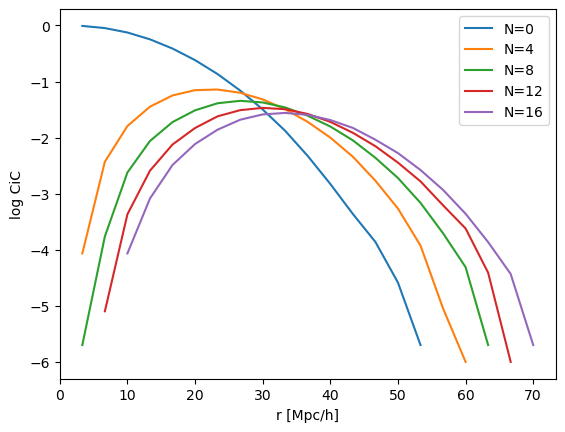

In [7]:
for N in range(0,20,4):
    plt.plot(cic.r, np.log10(cic.sel(N=N).values),
             label=f'N={N}')
plt.legend()
plt.xlabel('r [Mpc/h]')
plt.ylabel('log CiC')

/n/home11/ccuestalazaro/tmp/ipykernel_240540/3011193314.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(cic.N, np.log10(cic.sel(r=cic.r[rbin]).values),


Text(0, 0.5, 'log CiC')

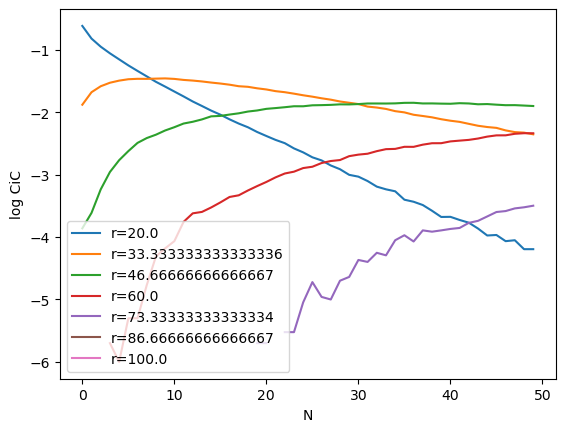

In [8]:
for rbin in range(5,30,4):
    plt.plot(cic.N, np.log10(cic.sel(r=cic.r[rbin]).values),
             label=f'r={float(cic.r[rbin])}')
plt.legend()
plt.xlabel('N')
plt.ylabel('log CiC')

Text(0, 0.5, 'CiC')

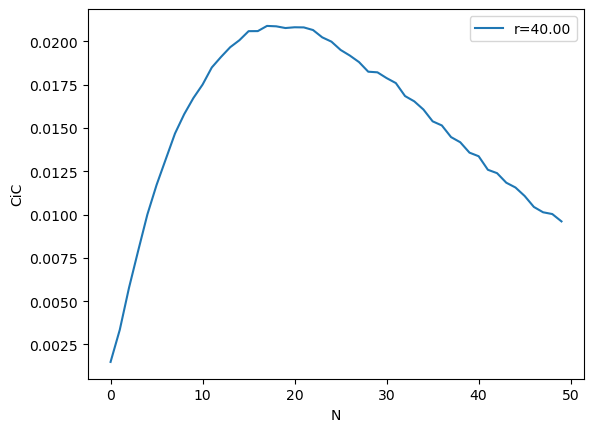

In [11]:
rbin = 11
plt.plot(cic.N, cic.sel(r=cic.r[rbin]).values,
             label=f'r={float(cic.r[rbin]):.2f}')
plt.legend()
plt.xlabel('N')
plt.ylabel('CiC')

## Computing summary statistics on survey data

In [ ]:
from ltu-cmass.survey.tools import BOSS_area
from ltu-cmass.cmass.tools import get_nofz

In [ ]:
galaxies_ra_dec_z = nblab.transform.SkyToCartesian(*cat.galaxies_pos.T, cosmo=nblab.cosmology.Planck15)

# given galaxy positions generate randoms in the same area

randoms_ra_dec_z = np.random.uniform(
    galaxies_ra_dec_z.min(axis=1),
    galaxies_ra_dec_z.max(axis=1),
    galaxies_ra_dec_z.shape
)
fiducial_cosmology= nblab.cosmology.Planck15
fsky = BOSS_area() / (360.0**2 / np.pi)
ng_of_z = get_nofz(galaxies_ra_dec_z[:, -1], fsky, cosmo=fiducial_cosmology)
galaxies_nbar = ng_of_z(galaxies_ra_dec_z[:, -1])
randoms_nbar = ng_of_z(randoms_ra_dec_z[:, -1])

In [ ]:
survey_cat = SurveyCatalogue(
    galaxies_ra_dec_z = galaxies_ra_dec_z,
    randoms_ra_dec_z= randoms_ra_dec_z,
    redshift = 0.5,
    galaxies_nbar = galaxies_nbar,
    randoms_nbar = randoms_nbar, 
    fiducial_cosmology= fiducial_cosmology,

)
tpcf_summarizer = TwoPCF()
tpcf_survey = tpcf_summarizer(survey_cat)
tpcf_survey = tpcf_summarizer.to_dataset(tpcf_survey)
print(tpcf_survey)


In [ ]:
# Test 2pcf, pk, marked_pk and wst

In [ ]:
# compare tpcf survey to cubic box
plt.loglog(tpcf.r, tpcf.sel(ells=0).values,label='Box')
plt.loglog(tpcf_survey.r, tpcf_survey.sel(ells=0).values, label='Survey')
plt.legend()
plt.xlabel('r [Mpc/h]')
plt.ylabel('TPCF')